### **Gaussian Mixture Model (GMM)**  
GMM is a **probabilistic model** that assumes data is generated from a mixture of **multiple Gaussian distributions**. Each Gaussian component represents a cluster, and the model assigns probabilities to each data point belonging to a specific component. GMM is commonly used for **clustering and density estimation**.

- **Key Features:**
  - Uses **Expectation-Maximization (EM)** to estimate parameters.
  - Assigns **soft cluster memberships** (unlike k-means, which assigns hard labels).
  - Can model **non-spherical clusters** better than k-means.
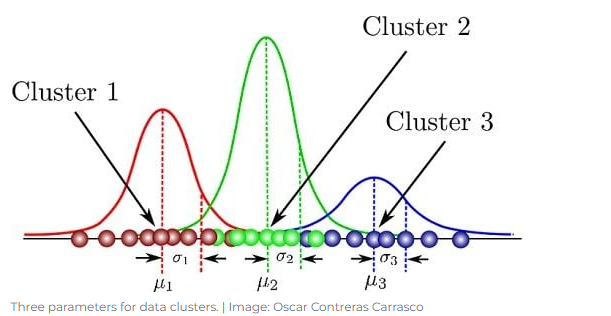
---

### **Principal Component Analysis (PCA)**  
PCA is a **dimensionality reduction** technique that transforms data into a new coordinate system where the axes (principal components) capture the maximum variance in the dataset.

- **Key Features:**
  - Reduces dimensionality while preserving most of the information.
  - Finds **uncorrelated features** by projecting data onto orthogonal axes.
  - Helps with **noise reduction** and **computational efficiency** in machine learning models.

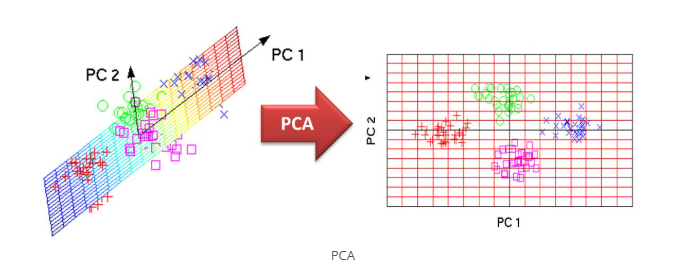

### **Details on Gaussian Mixture Model (GMM)**  

#### **1. What is a Gaussian Mixture Model (GMM)?**  
A **Gaussian Mixture Model (GMM)** is a **probabilistic model** used for **clustering and density estimation**. It assumes that data is generated from multiple **Gaussian (normal) distributions**, each representing a different cluster or subgroup in the dataset.  

Instead of assigning each data point to a single cluster (like K-Means), GMM assigns **probabilities** to each point belonging to different clusters.

---

#### **2. How Does GMM Work?**  

GMM models the **probability distribution** of data as a weighted sum of multiple Gaussian distributions:

$$
P(X) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(X | \mu_k, \Sigma_k)
$$

where:  
- $ K $ = Number of Gaussian components (clusters)  
- $ \pi_k $ = Mixing coefficient (weight) for each Gaussian (sum of all weights = 1)  
- $ \mathcal{N}(X | \mu_k, \Sigma_k) $ = Gaussian distribution with mean $ \mu_k $ and covariance $ \Sigma_k $  

Each data point has a probability of belonging to each cluster, making GMM more **flexible** than hard clustering methods.

---

#### **3. How is GMM Trained? (Expectation-Maximization - EM Algorithm)**  
Since we don’t know which Gaussian each point belongs to, GMM uses the **Expectation-Maximization (EM) algorithm** to estimate parameters iteratively:

1. **Expectation (E-step):**  
   - Calculate the probability that each data point belongs to each Gaussian component (using Bayes' theorem).  
2. **Maximization (M-step):**  
   - Update the parameters $(\mu_k, \Sigma_k, \pi_k)$ of each Gaussian distribution based on the probabilities from the E-step.  
3. **Repeat** until the model converges (i.e., parameters stabilize).  

---

#### **4. Applications of GMM**
- **Clustering** (e.g., customer segmentation, image segmentation)
- **Anomaly Detection** (finding outliers in financial fraud detection)
- **Density Estimation** (estimating the underlying distribution of data)
- **Synthetic Data Generation** (creating new data points with similar characteristics)

---

#### **5. Difference Between GMM and K-Means**
| Feature | GMM | K-Means |
|---------|-----|---------|
| **Clustering Type** | Soft clustering (probabilistic) | Hard clustering (each point belongs to one cluster) |
| **Shape of Clusters** | Elliptical (based on covariance) | Spherical (equal variance) |
| **Probability Assignment** | Each point has a probability for each cluster | Points belong to one cluster only |
| **Algorithm Used** | Expectation-Maximization (EM) | Lloyd’s Algorithm |


### **Difference Between Simple Gibbs Sampling and Gibbs Sampling Based on GMM**  

#### **1. Simple Gibbs Sampling**  
Gibbs Sampling is a **Markov Chain Monte Carlo (MCMC) method** used to generate samples from a complex **joint probability distribution** when direct sampling is difficult. It works by iteratively sampling from **conditional distributions** of each variable while keeping others fixed.

- **How It Works:**
  1. Initialize all variables.
  2. Sample one variable at a time from its conditional distribution, given the current values of other variables.
  3. Repeat until convergence.

- **Use Case:**  
  - Often used in **Bayesian inference** when direct sampling from the full joint distribution is infeasible.
  - Useful for sampling from distributions where we know the conditionals but not the full joint distribution.

---

#### **2. Gibbs Sampling Based on GMM**  
Gibbs Sampling using **Gaussian Mixture Models (GMMs)** is an extension where we assume that data points come from a mixture of Gaussian distributions. Instead of sampling from arbitrary conditionals, we incorporate the structure of a **GMM** to generate synthetic data.

- **How It Works:**  
  1. Fit a **GMM** to the observed data using Expectation-Maximization (EM).
  2. Use the estimated parameters (means, covariances, mixing probabilities) to define conditional distributions.
  3. Iteratively sample:
     - Assign each data point to a Gaussian component (latent variable $ z $).
     - Sample a new data point from the corresponding Gaussian distribution.

- **Use Case:**  
  - Generates **realistic synthetic data** while preserving the original distribution.
  - Used in **data augmentation** and **handling imbalanced datasets**.

---

### **Key Differences**
| Feature                     | Simple Gibbs Sampling | Gibbs Sampling with GMM |
|-----------------------------|----------------------|-------------------------|
| **Sampling Basis**           | Uses arbitrary conditionals | Uses Gaussian mixture components |
| **Assumptions**              | No assumption about the data distribution | Assumes data is generated from a mixture of Gaussians |
| **Application**              | Bayesian inference, Markov Chains | Synthetic data generation, clustering |
| **Complexity**               | Simpler, does not require a predefined model | Requires training a GMM first |


# Import all necessary libraries

In [24]:
from sklearn.neighbors import KernelDensity
import numpy as np
import pandas as pd
from sklearn.utils import resample
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Load the dataset and some basic exploration

In [25]:
# 1. Load the dataset
# Load the dataset (replace 'telecom_churn_data.csv' with your actual file path)
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print(data.head())
data.columns
print(data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Data Preprocessing

- Handling Missing Values:
    - Categorical columns are imputed using the most frequent value.
    - Numerical columns are imputed using the mean value.

- Encoding Categorical Features:
    - Label encoding is applied to the target variable (Churn).
    - One-hot encoding is applied to categorical predictors to convert them into numerical format.

In [26]:
# Automatically identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For categorical columns, we'll use mode imputation
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Apply the imputer to each categorical column individually
for col in categorical_columns:
    data[col] = imputer_categorical.fit_transform(data[[col]]).reshape(-1)

# For numerical columns, we use mean imputation
imputer_numerical = SimpleImputer(strategy='mean')

# Apply the imputer to each numerical column individually
for col in numerical_columns:
    data[col] = imputer_numerical.fit_transform(data[[col]])
# Separate the target variable (Churn) from the features before applying pd.get_dummies
y = data['Churn']
X = data.drop(columns=['Churn'])

# Convert categorical labels 'Yes'/'No' into numerical labels 1/0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Remove 'Churn' from the categorical_columns list, as it is the target variable
categorical_preds = [col for col in categorical_columns if col != 'Churn']

# Apply One-Hot Encoding only to categorical columns (excluding Churn)
X = pd.get_dummies(X, columns=categorical_preds, drop_first=True)

# Exploratory Data Analysis (EDA)
- Visualizing the distribution of the target variable
- Plotting feature distributions
- Correlation analysis using a heatmap

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


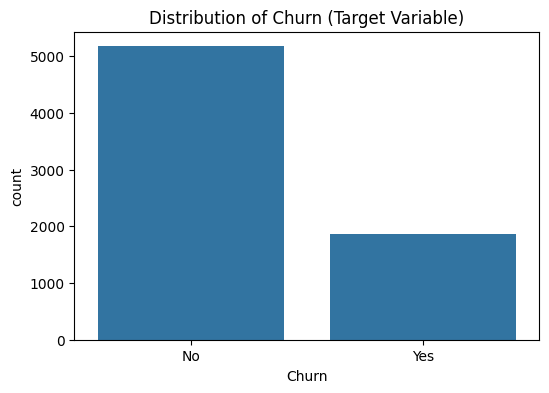

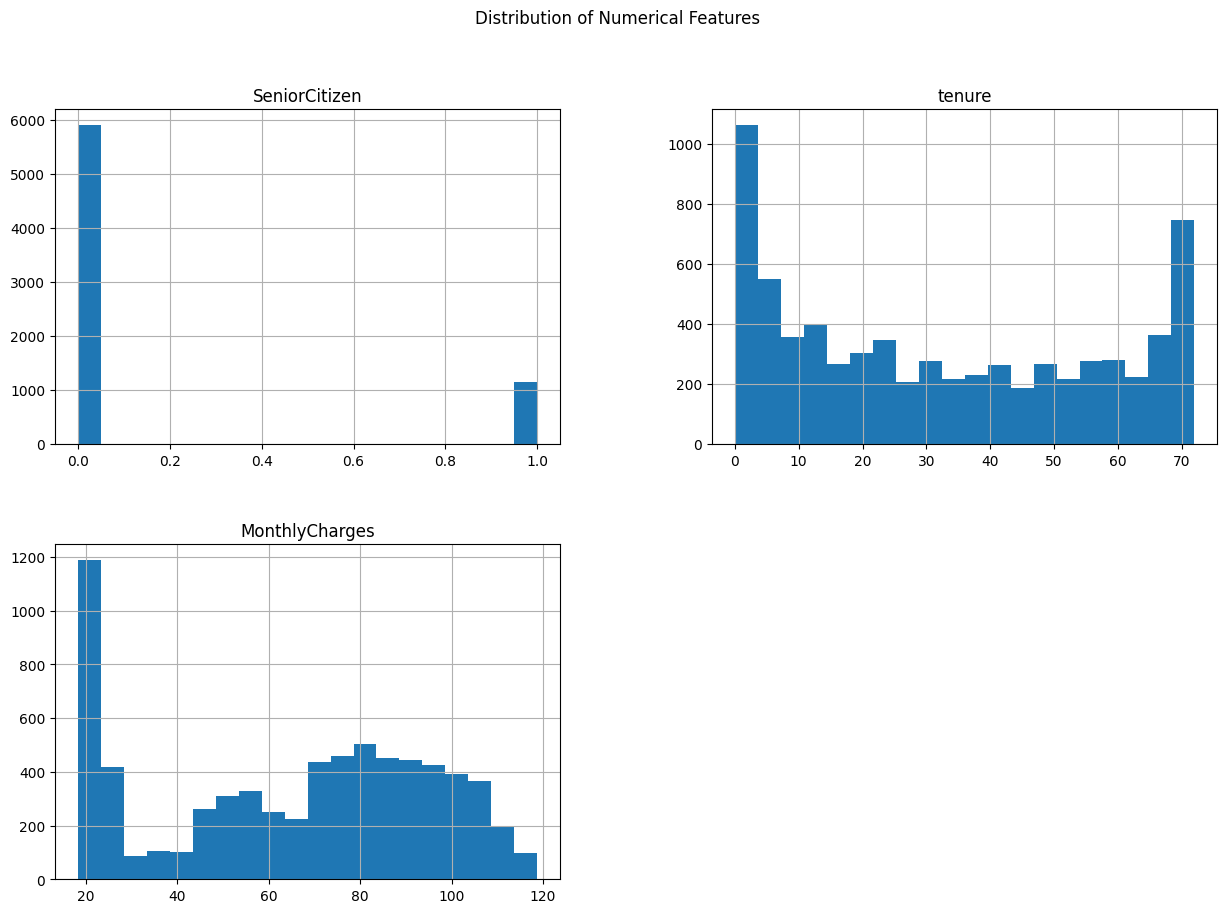

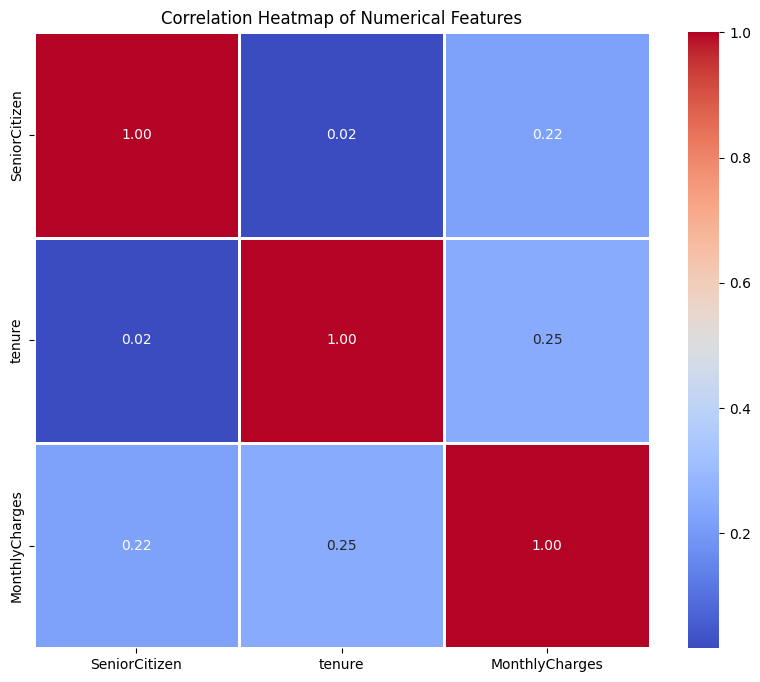

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [27]:
# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn (Target Variable)')
plt.show()
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print(data.columns)

# Feature Engineering & Splitting Data
- Feature Standardization: StandardScaler is used to scale numerical features.
- Train-Test Split: Data is split into 80% training and 20% testing.

In [28]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for models that require scaling (e.g., XGBoost)
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Model Selection & Evaluation Metrics
- Models used include Decision Tree, Naive Bayes, KNN, Random Forest, AdaBoost, and XGBoost.
- Models are evaluated based on precision, recall, F1-score, AUC, and Precision-Recall AUC.

In [29]:
# Define additional models
models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),  # Naive Bayes
    KNeighborsClassifier(),  # KNN
    RandomForestClassifier(random_state=42), 
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42),
    XGBClassifier(random_state=42)
]

# Resampling Techniques to Handle Imbalanced Data
- Optimized version of Gibbs Sampling based on Gaussian Mixture Models (GMM) to speed up the process
    - Gaussian Mixture Model (GMM) is used to model the distribution of the minority class.
    - Gibbs sampling generates synthetic samples from this learned distribution.
- Rejection Sampling (using KDE)
- SMOTE (Synthetic Minority Oversampling Technique)
- Random Undersampling

In [30]:
def gibbs_sampling_gmm(X_minority, n_samples):
    gmm = GaussianMixture(n_components=2, random_state=42).fit(X_minority)
    samples, _ = gmm.sample(n_samples)
    return samples

In [31]:
def rejection_sampling(X_minority, n_samples, distribution):
    samples = []
    while len(samples) < n_samples:
        candidate = distribution.rvs() # Sample from the distribution
        if np.random.ran() < 0.5: # For accept or reject based on some condition
            samples.append(candidate[0])
    return np.array(samples)

def rejection_sampling_method(X_minority, n_samples, distribution):
    samples = []
    while len(samples) < n_samples:
        candidate = kde_model.sample(1) # Sample from the distribution
        if np.random.ran() < 0.5: # For accept or reject based on some condition
            samples.append(candidate[0])
    return np.array(samples)

In [32]:
# Applying these sampling techniques to oversample minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#applying RandomUnderSampler dor undersamping majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Applying rejection sampling using KDE to estimate the minority class distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_train[y_train == 1])

# PCA for Dimensionality Reduction
- Principal Component Analysis (PCA) reduces the number of features from the original dataset.

In [33]:
num_components = 50
pca = PCA(n_components = num_components)
X_train_reduced = pca.fit_transform(X_train.astype(np.float32))
X_test_reduced = pca.fit_transform(X_test.astype(np.float32))

# Model Evaluation with Different Resampling Methods
Each model is evaluated with different resampling techniques:
- SMOTE
- Random Undersampling
- Rejection Sampling
- Gibbs Sampling

In [34]:
# Function to evaluate model performance with AUC, AUC-PR, and F1-score
def evaluate_model_with_resampling(model, X_train, y_train, X_test, y_test, resample_method=None, method_name="None"):
    """
    Evaluates the model on multiple metrics such as precision, recall, f1-score, AUC, AUC-PR.
    Also takes into account the resampling method.
    """
    print(f"Let's consider the analysis for {model}")
    print(f"\nEvaluating with {method_name} resampling:")
    
    if resample_method:
        X_train_resampled, y_train_resampled = resample_method(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities for ROC and AUC-PR
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision, recall, F1 score
    y_pred = model.predict(X_test)
    
    # Performance metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC-AUC and AUC-PR
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    auc_pr = average_precision_score(y_test, y_pred_prob)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc_val = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
    
    # Plot ROC Curve and Precision-Recall Curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(recall_vals, precision_vals, color='b', lw=2, label=f'Precision-Recall Curve (AUC-PR = {auc_pr:.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()
    
    scores = {}
    scores['accuracy'] = accuracy
    scores['precision'] = precision
    scores['recall'] = recall
    scores['f1-score'] = f1
    scores['auc'] = roc_auc_val
    scores['auc-pr'] = auc_pr
    
    return model, scores

In [35]:
X_train_resampled 

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
1470,-0.437749,-0.997982,-1.517758,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6041,-0.437749,-1.120820,-1.492830,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6153,-0.437749,1.131213,-1.459592,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,-0.437749,0.230400,-1.481197,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6414,-0.437749,0.312292,-1.316672,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,2.284413,-1.284605,0.383417,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5334,-0.437749,0.680806,1.432055,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3092,-0.437749,-1.284605,-1.321658,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3772,-0.437749,-1.284605,1.001632,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Evaluating with SMOTE Oversampling:
Let's consider the analysis for DecisionTreeClassifier(random_state=42)

Evaluating with SMOTE resampling:


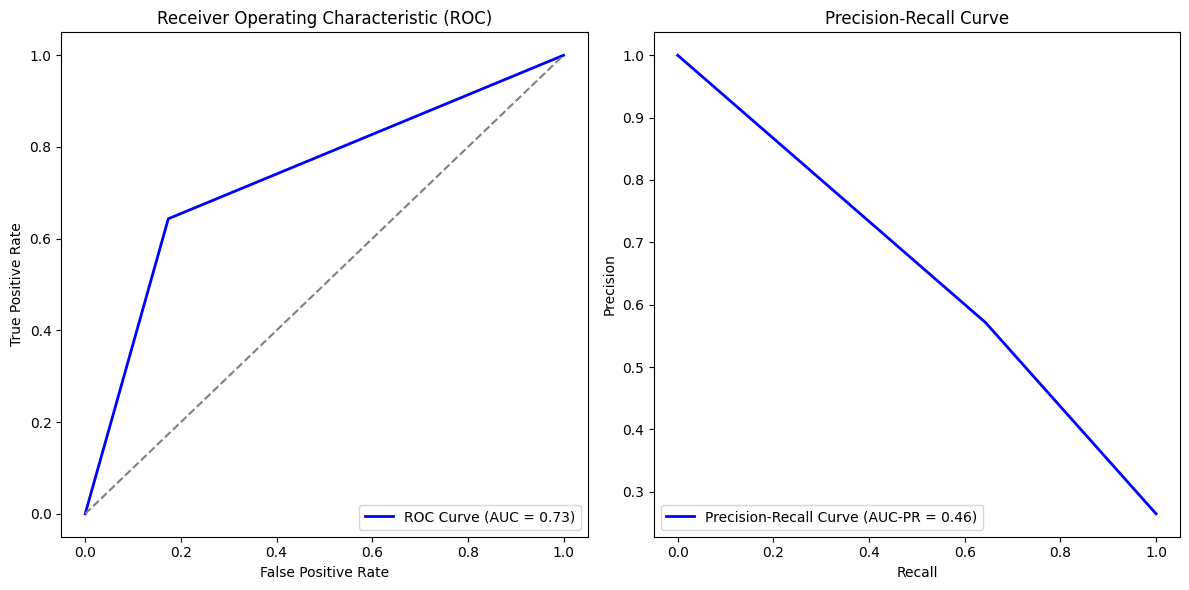

Let's consider the analysis for GaussianNB()

Evaluating with SMOTE resampling:


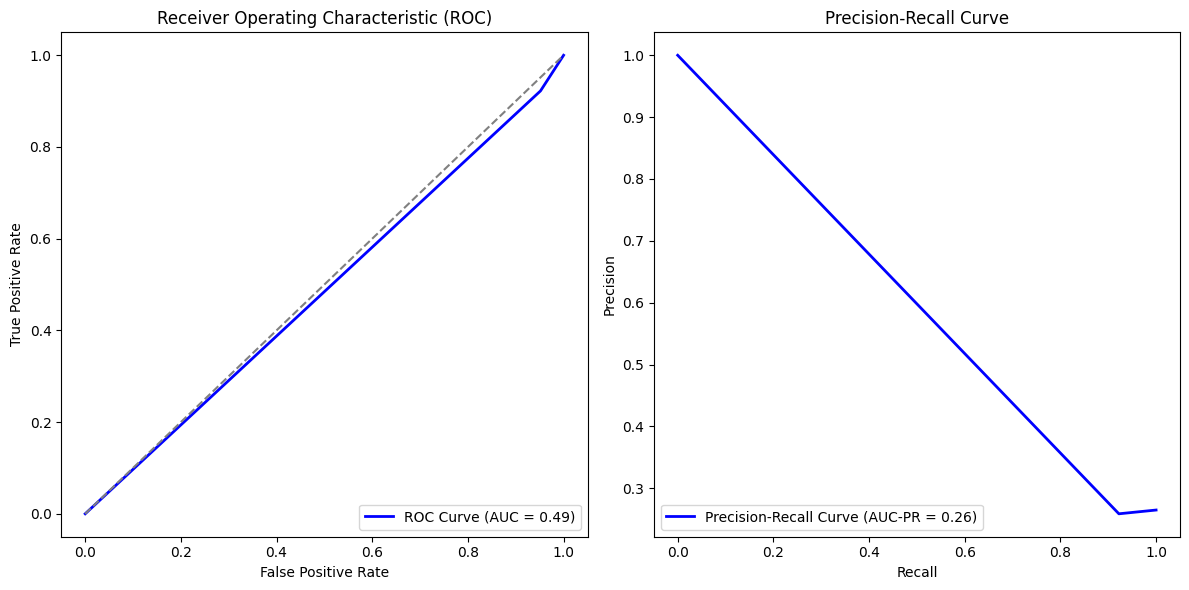

Let's consider the analysis for KNeighborsClassifier()

Evaluating with SMOTE resampling:


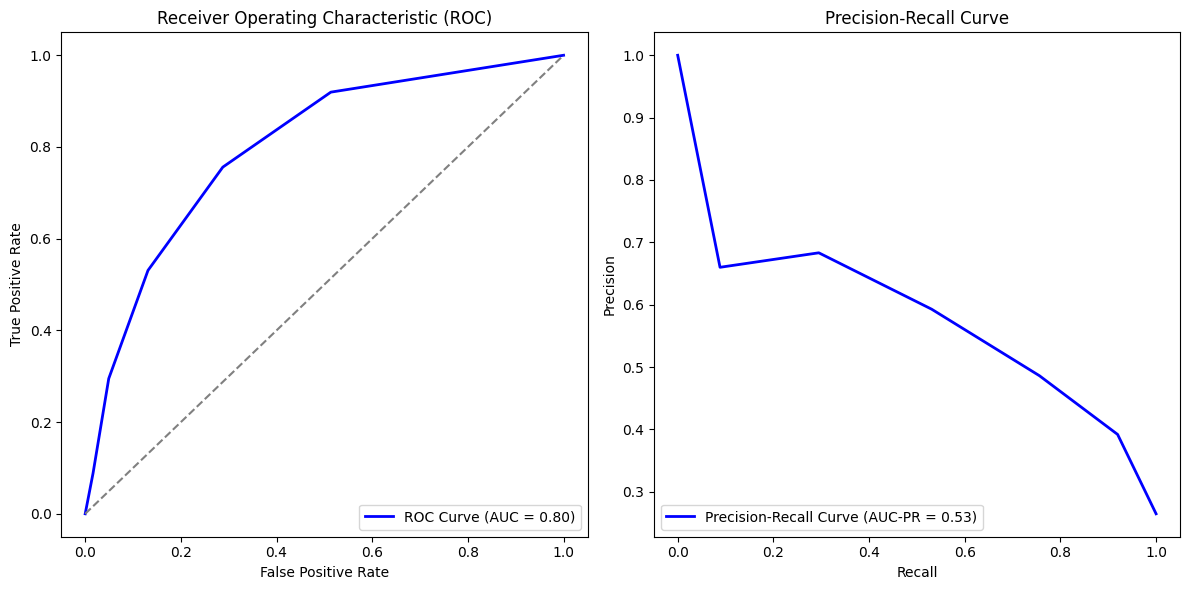

Let's consider the analysis for RandomForestClassifier(random_state=42)

Evaluating with SMOTE resampling:


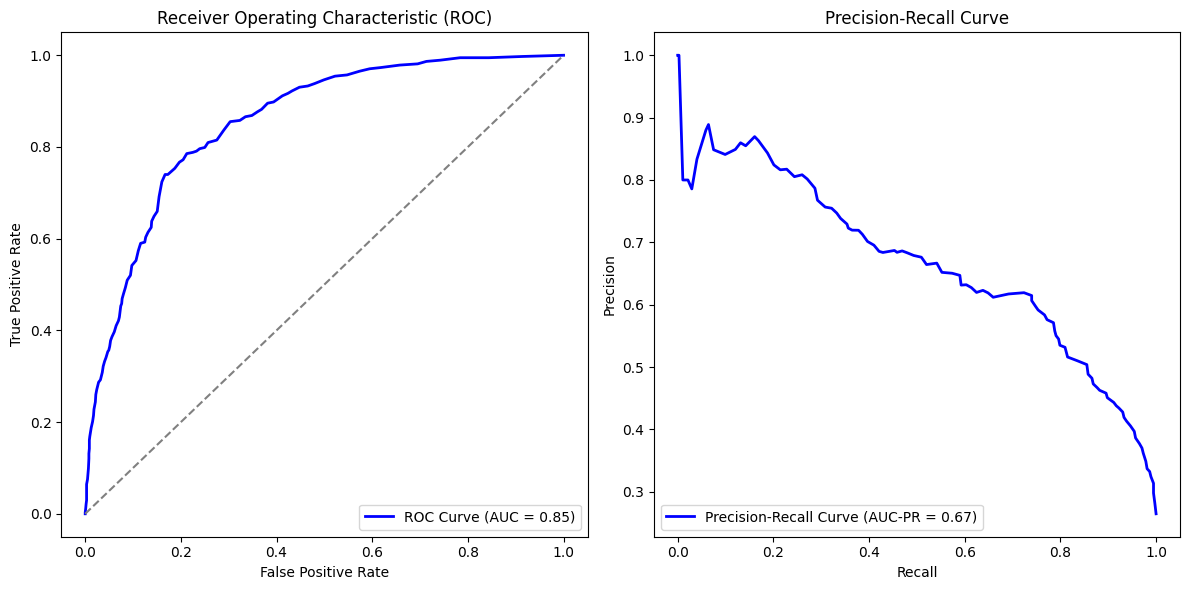

Let's consider the analysis for AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

Evaluating with SMOTE resampling:


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KeyboardInterrupt: 

In [36]:
# Evaluate with SMOTE oversampling
print("Evaluating with SMOTE Oversampling:")
scores_smote = {}
for model in models: temp_model, temp_scores = evaluate_model_with_resampling(model, X_train, y_train, X_test, y_test, smote.fit_resample, "SMOTE")

model_name = type(model).__name__
scores_smote[model_name] = temp_scores


# Evaluate with Random Undersampling
print("Evaluating with Random Undersampling:")
scores_undersample = {}
for model in models: temp_model, temp_scores = evaluate_model_with_resampling(model, X_train, y_train, X_test, y_test, undersampler.fit_resample, "Random Undersampling")

model_name = type(model).__name__
scores_undersample[model_name] = temp_scores

# Evaluate with Rejection Sampling
print("Evaluating with Rejection Sampling:")
scores_reject = {}
for model in models: temp_model, temp_scores = evaluate_model_with_resampling(model, X_train, y_train, X_test, y_test, lambda X,y: (X,y), "Rejection sampling (KDE Based)")

model_name = type(model).__name__
scores_reject[model_name] = temp_scores

print("Evaluating with Gibbs Sampling:")
scores_gibbs = {}
for model in models:
    X_minority = X_train_resampled[np.where(y_train == 1)[0]]
    gibbs_samples = gibbs_sampling_gmm(X_minority, n_samples=1000)

    X_train_gibbs = np.vstack([X_train_reduced, gibbs_samples])
    y_train_gibbs = np.vstack([y_train, np.ones(len(gibbs_samples))])

    temp_model, temp_scores = evaluate_model_with_resampling(model, X_train, y_train, X_test, y_test, lambda X,y: (X,y), "Gibbs sampling")

model_name = type(model).__name__
scores_gibbs[model_name] = temp_scores


# Visualization of Model Performance
- Comparison of model performance across different resampling techniques using bar plots

# Questions
- Why is data preprocessing necessary before training a machine learning model?
- What are the differences between one-hot encoding and label encoding? When would you use each?
- How does exploratory data analysis (EDA) help in building a better predictive model?
- Why is feature standardization important, and how does it affect model performance?
- Explain the role of PCA in dimensionality reduction. How does it improve model efficiency?
- Suppose your dataset has missing values. How would you handle them for both numerical and categorical variables?
- If a dataset is highly imbalanced, what resampling techniques can be used to address the issue? How does SMOTE differ from random undersampling?
- What are some key evaluation metrics for model performance? Why might accuracy not always be a good measure?
- How does synthetic data generation using Gibbs Sampling and Gaussian Mixture Models (GMM) work?
- Given multiple machine learning models, how would you decide which model performs the best?
- Modify the imputation strategy: Change the code so that numerical columns are imputed using the median instead of the mean.
- Change the feature scaling method: Replace StandardScaler with MinMaxScaler to scale the numerical features
- Adjust PCA components: Modify the number of principal components in PCA to keep 95% of the variance instead of using a fixed value of 50.
- Modify the synthetic data generation process: Change the number of Gaussian components in GMM from 2 to 3.